In [123]:
# Initial importing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [124]:
# Reading in the CSV
insurance = pd.read_csv("insurance.csv")

In [125]:
# Getting familiar with the data
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [126]:
#Initial analysis
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


This dataframe is to determine the insurance charges for each person.
Age, sex, bmi, children, smoker, and region are all factors contributing to the charges for insurance.
The charges range from $1,121.88 to $63,770.43 with the mean being $13,270.42.
It seems like there may be some outliers in the charges as the max charges is very far from the median.

In [127]:
# Converting strings to dummy columns so that can move on to correlation analysis
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region' ], drop_first=True)



In [128]:
insurance.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [129]:
##Correlations
correlations = (insurance.corr())
print(correlations)


                       age       bmi  children   charges  sex_male  \
age               1.000000  0.109272  0.042469  0.299008 -0.020856   
bmi               0.109272  1.000000  0.012759  0.198341  0.046371   
children          0.042469  0.012759  1.000000  0.067998  0.017163   
charges           0.299008  0.198341  0.067998  1.000000  0.057292   
sex_male         -0.020856  0.046371  0.017163  0.057292  1.000000   
smoker_yes       -0.025019  0.003750  0.007673  0.787251  0.076185   
region_northwest -0.000407 -0.135996  0.024806 -0.039905 -0.011156   
region_southeast -0.011642  0.270025 -0.023066  0.073982  0.017117   
region_southwest  0.010016 -0.006205  0.021914 -0.043210 -0.004184   

                  smoker_yes  region_northwest  region_southeast  \
age                -0.025019         -0.000407         -0.011642   
bmi                 0.003750         -0.135996          0.270025   
children            0.007673          0.024806         -0.023066   
charges             0.78725

Text(0.5, 1.0, "Pearson's Correlation Heatmap ")

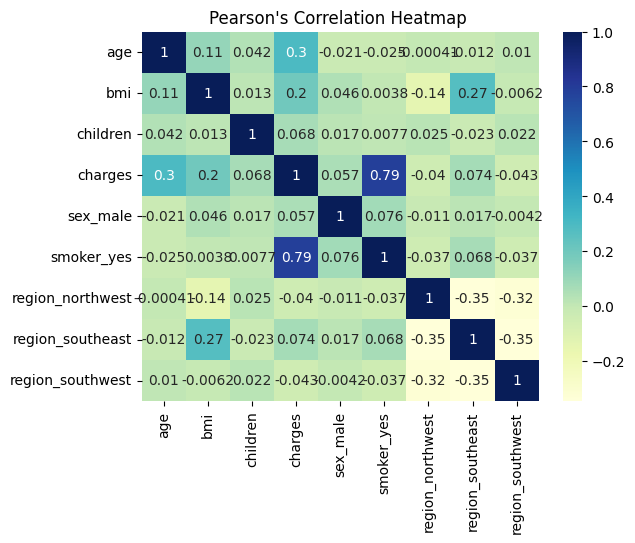

In [130]:
# Mapping correlations on a heatmap

import seaborn as sns

sns.heatmap(correlations, annot=True, cmap="YlGnBu")

plt.title("Pearson's Correlation Heatmap ")


The above heatmat shows that smoker_yes, age, and bmi have the highest correlation to the charges.
region_southeast has a bit higher correlation than the remaining columns, so I will analyze that a bit further to see if it should be kept

Text(0.5, 1.0, 'Smoker Vs Charges')

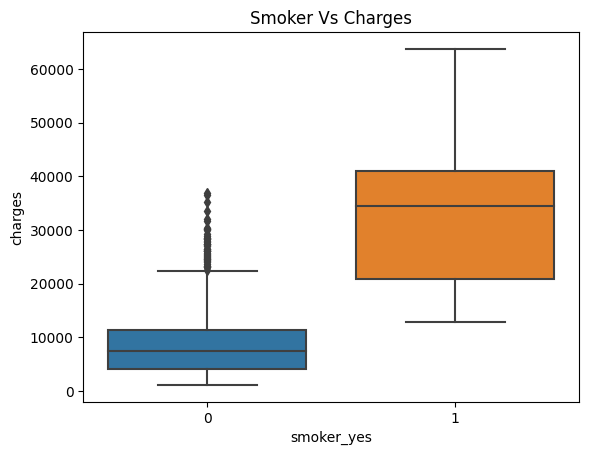

In [131]:
# Graphing categorical data for potential feature on a boxplot
boxplot = sns.boxplot(x=insurance['smoker_yes'], y=insurance['charges'])

plt.title("Smoker Vs Charges")



The above plt shows that smokers pay a lot more than non- smokers.  This will cause a high coefficient for smoker_yes.

Text(0.5, 1.0, 'Region Vs Charges')

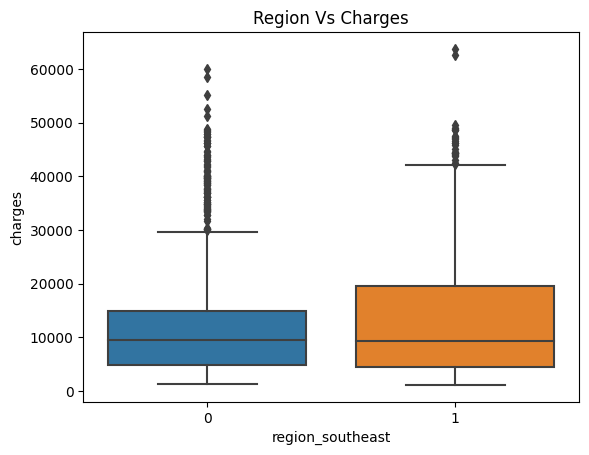

In [132]:
# Graphing categorical data for potential feature on a boxplot
boxplot = sns.boxplot(x=insurance['region_southeast'], y=insurance['charges'])

plt.title("Region Vs Charges")

There is not much of a difference in charges between those who live in the southeast region and those that do not.
I will therefore not include this column in the features.

<function matplotlib.pyplot.show(close=None, block=None)>

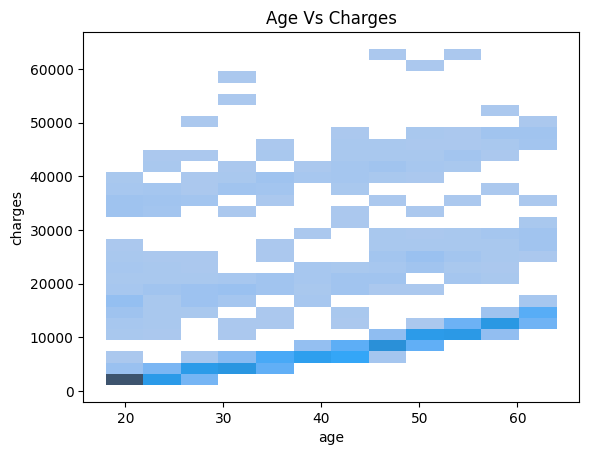

In [133]:
# Graphing numerical data for potential feature on a histogram

sns.histplot(x=insurance['age'], y=insurance['charges'])

plt.title("Age Vs Charges")

plt.show



The above plot show quite a linear relation - the higher the age, the higher the charges. 
This will be great for the linear regression model. 

Text(0.5, 1.0, 'BMI Vs Charges')

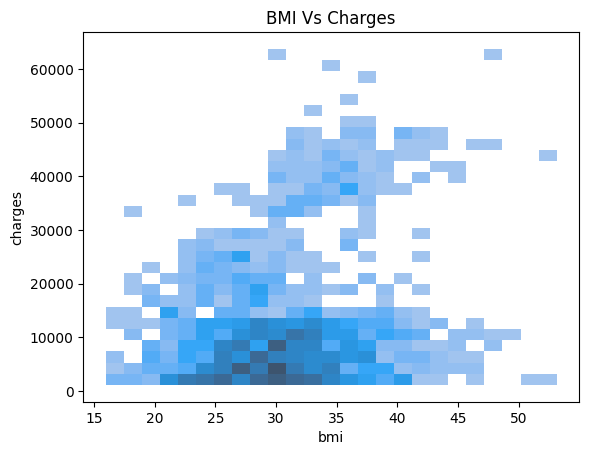

In [134]:
# Graphing numerical data on a histogram
sns.histplot(x=insurance['bmi'], y=insurance['charges'])

plt.title("BMI Vs Charges")



There is definitely some sort of linear relation between bmi and charges, but it is quite weak.
However, since the regression is visible, I will include this in the model.

Based on all the above research, I will include the smoker_yes, age, and BMI factors in my model.
The smoker_yes looks like it will have the highest slope.
The age appears to fit best for the linear regression model.
The BMI will not be the strongest factor, but will hopefully help out the model.

In [135]:
##Splitting the dataframe into features/ target

X = insurance[['smoker_yes', 'age', 'bmi']]
y=insurance['charges']

In [136]:
# Dividing the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=417)


In [137]:
#Data normalization with min/max scaler

mms= MinMaxScaler()

X_train_scaled = mms.fit_transform(X_train)

X_test_scaled = mms.transform(X_test)

In [138]:
#Instantiating Linear Regression Object

lr = LinearRegression()

In [139]:
#Fitting the model

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [140]:
#
train_predictions = lr.predict(X_train_scaled)

In [141]:
#Examine the coefficients of the model
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table.rename({0:'Features'},axis=1)

,Features,Coefs
0,smoker_yes,24037.828560
1,age,11543.341358
2,bmi,11948.629198


In [142]:
# Examine the coefficient of determination,R2

lr.score(X_train_scaled, y_train)

0.7465602925952696

In [143]:
#Calculate the mean squared error (MSE) based on just the training set.
MSE = mean_squared_error(y_train, train_predictions)
print(MSE)

37200431.532501735


In [144]:
#Calculate the RMSE based on just the training set.
RMSE = mean_squared_error(y_train, train_predictions, squared = False)
print(RMSE)

6099.215648958621


In [145]:
#Calculate the mean absolute error (MAE) based on just the training set.
MAE = mean_absolute_error(y_train, train_predictions)

As per initial analysis, the smoker_yes column has the highest coefficient.  A smoker will have an increase of $24,037.83 in charges.

BMI has the next strogest slope.  Althogh the initial analysis graph was not so linear, the slope was stronger.  An increase in BMI will cause insurance charges to increase by $11,948.63

Age has the lease impact on the charges as the slope is the lowet - $11,543.34.  However, it was the most linear- so it is still probably most helpful to the model.  To increase accuracy of this model, I may want to put more weight on this factor.

the R2 is 75% which is not bad.

The RMSE is 6099 which menas that insurance charges may be off by $6099.



Text(0, 0.5, 'Residual')

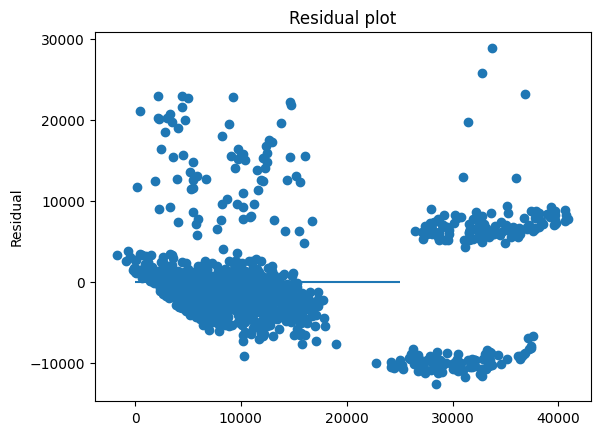

In [146]:
#Residual plot for train set
plt.scatter(train_predictions, y_train- train_predictions )
plt.hlines(y=0, xmin = 0, xmax = 25000) 
plt.title('Residual plot')
plt.ylabel('Residual')


The points do seem clustered around the zero which is a good sign.

It is a little concentrated in the beginning showing some sort of downward linear slope which be mean it is not perfect.

But the rest seems pretty random.

All in all the model seems like an ok fit for the data

In [147]:
# Check the intercept of the model.

print(lr.intercept_)


-1671.0647719045755


The intercept of the model is -1671.  This has no significance as the factors do not make sense to be zero and they would definitely not cause insurance to owe the consumer money.

In [148]:
#Examine the coefficients of the model
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lr.coef_.transpose())
coef_table.rename({0:'Features'},axis=1)

,Features,Coefs
0,smoker_yes,24037.828560
1,age,11543.341358
2,bmi,11948.629198


The smoker has the highest effect on the charges, then the age, and then the bmi.
The age and bmi are hard to interperet as they were normalized...without normalization, every year the charge goes up by $250.95 and Every BMI increase causes the charges to increase by $321.46

In [149]:
# Take the test dataset, and use the model to produce the fitted values
predictions = lr.predict(X_test_scaled)

In [150]:
MSE = mean_squared_error(y_test, predictions)
print(MSE)

36344976.232026674


In [151]:
RMSE = mean_squared_error(y_test, predictions, squared = False)
print(RMSE)

6028.679476637208


In [152]:
mean_absolute_error(y_test, predictions)

4104.674986883747

In [154]:
lr.score(X_test_scaled, y_test)

0.7503102987064661

The R2 is slightly higher on the testing than the training.  This shows that the model trained well.

The RMSE is slightly lowere on the testing than the training.

It is interesting to note that the model preformed better on the testing data than on the training data.

In summary: 

Smoking has the highest impact on insurance charges.  A smoker pays $24037.83 more than a non smoker.

Next is BMI.  With every BMI increase, the charges increse by $321.46.

For age, every year causes the charges to increase by $250.95.

I would be interested in finding a way to make the age have more weight in this model as it had the most linear correlation.  This may make the model accuracy go up.

Thank you for marking:)



